<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/10_Nonlinear_intro/10_4_Twoclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 10: Nonlinear Learning and Feature Engineering

# 10.4 Nonlinear Two-Class Classification

In this Section we introduce the general framework of nonlinear classification, along with a number of elementary examples.  These examples are all low dimensional, allowing us to visually examine patterns in the data and propose appropriate nonlinearities, which we can (as we will see) very quickly inject into our linear supervised paradigm to produce nonlinear classifications.  As in the prior Sections, in doing we are performing nonlinear feature engineering for the two-class classification paradigm.  Just as with the previous Section by walking through these examples we flush out a number important concepts in concrete terms, coding principles, and jargon-terms in a relatively simple environment that will be omnipresent in our discussion of nonlinear learning going forward.

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone datasets
    if not Path('chapter_10_datasets').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/10_Nonlinear_intro/chapter_10_datasets
    else:
        print('chapter_10_datasets already cloned!')

    # clone library subdirectory
    if not Path('chapter_10_library').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/10_Nonlinear_intro/chapter_10_library
    else:
        print('chapter_10_library already cloned!')

    # clone images
    if not Path('chapter_10_images').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/10_Nonlinear_intro/chapter_10_images
    else:
        print('chapter_10_images already cloned!')
        
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_10_library') 

# import section helper
import section_10_4_helpers

# dataset paths
data_path_1 = "chapter_10_datasets/2d_classification_data_v1.csv"
data_path_2 = "chapter_10_datasets/signed_projectile.csv"
data_path_3 = "chapter_10_datasets/ellipse_2class_data.csv"

# image paths
image_path_1 = "chapter_10_images/10_3.png"
image_path_2 = "chapter_10_images/1d_logistic_linear.png"
image_path_3 = "chapter_10_images/1d_logistic_quadratic.png"

# standard imports
import matplotlib.pyplot as plt
from matplotlib import gridspec
import IPython, copy
from IPython.display import Image

# import autograd-wrapped numpy
import autograd.numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

##  Modeling principles  of linear two class classification

While we employed a *linear* model in deriving linear two-class classification in Chapter 6, this linearity was simply an *assumption* about the sort of boundary that (in general) largely distinguishe two classes of data.  Our assumption of a linear boundary translates precisely to the linear model 

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{w}\right) = \mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,} 
\end{equation}

where here we use the same compact notation here as in e.g., [Section 10.2.1](https://jermwatt.github.io/machine_learning_refined/notes/10_Nonlinear_intro/10_2_Regression.html).  Our linear decision boundary  - employing by default label values $y_p \in \left\{-1,+1\right\}$ - then lies precisely where this formula (for a fixed set of parameters) for input $\mathbf{x}$ where $\mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,}  = 0$ and label predictions are made (see [Section 6.3](https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_3_Softmax.html)) as

\begin{equation}
y = \text{sign}\left(\mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,}\right).
\end{equation}

To tune the set of weights properly for a given dataset we must minimize a proper two-class classification cost function like e.g., the Softmax / Cross-Entropy

\begin{equation}
 g\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^{P} \text{log}\left(1 + e^{-y_p  \mathring{\mathbf{x}}_{p}^T \mathbf{w}}\right).
\end{equation}

##  Modeling principles  of nonlinear two class classification

However like the linear assumption made with regression, this was simply an assumption - we can just as easily assume *nonlinear* models / decision boundaries and derive precisely the same cost functions we arrived at there.  In other words while we employed a *linear* model throughout Chapter 6 in deriving two-class classification schemes we could have just as well use any *nonlinear* model of the general form we have employed throughout this Chapter 

\begin{equation}
\text{model}\left(\mathbf{x},\Theta\right) = w_0 + f_1\left(\mathbf{x}\right){w}_{1} +  f_2\left(\mathbf{x}\right){w}_{2} + \cdots + f_B\left(\mathbf{x}\right)w_B
\end{equation}

where $f_1,\,f_2,\,...\,f_B$ are nonlinear parameterized or unparameterized functions - or *feature transformations* - and $w_0$ through $w_B$ (along with any additional weights internal to the nonlinear functions) are represented in the weight set $\Theta$ and must be tuned properly.  We can express this - using the same compact notation introduced in 10.1.2 - equivalently as 

\begin{equation}
\text{model}\left(\mathbf{x},\Theta\right) = \mathring{\mathbf{f}}_{\,}^T \mathbf{w}.
\end{equation}

In complete analogy to the linear case, here our decision boundary consists of all inputs $\mathbf{x}$ where $\mathring{\mathbf{f}}_{\,}^T \mathbf{w} = 0$ and likewise predictions are made as

\begin{equation}
y = \text{sign}\left(\mathring{\mathbf{f}}_{\,}^T \mathbf{w}\right).
\end{equation}



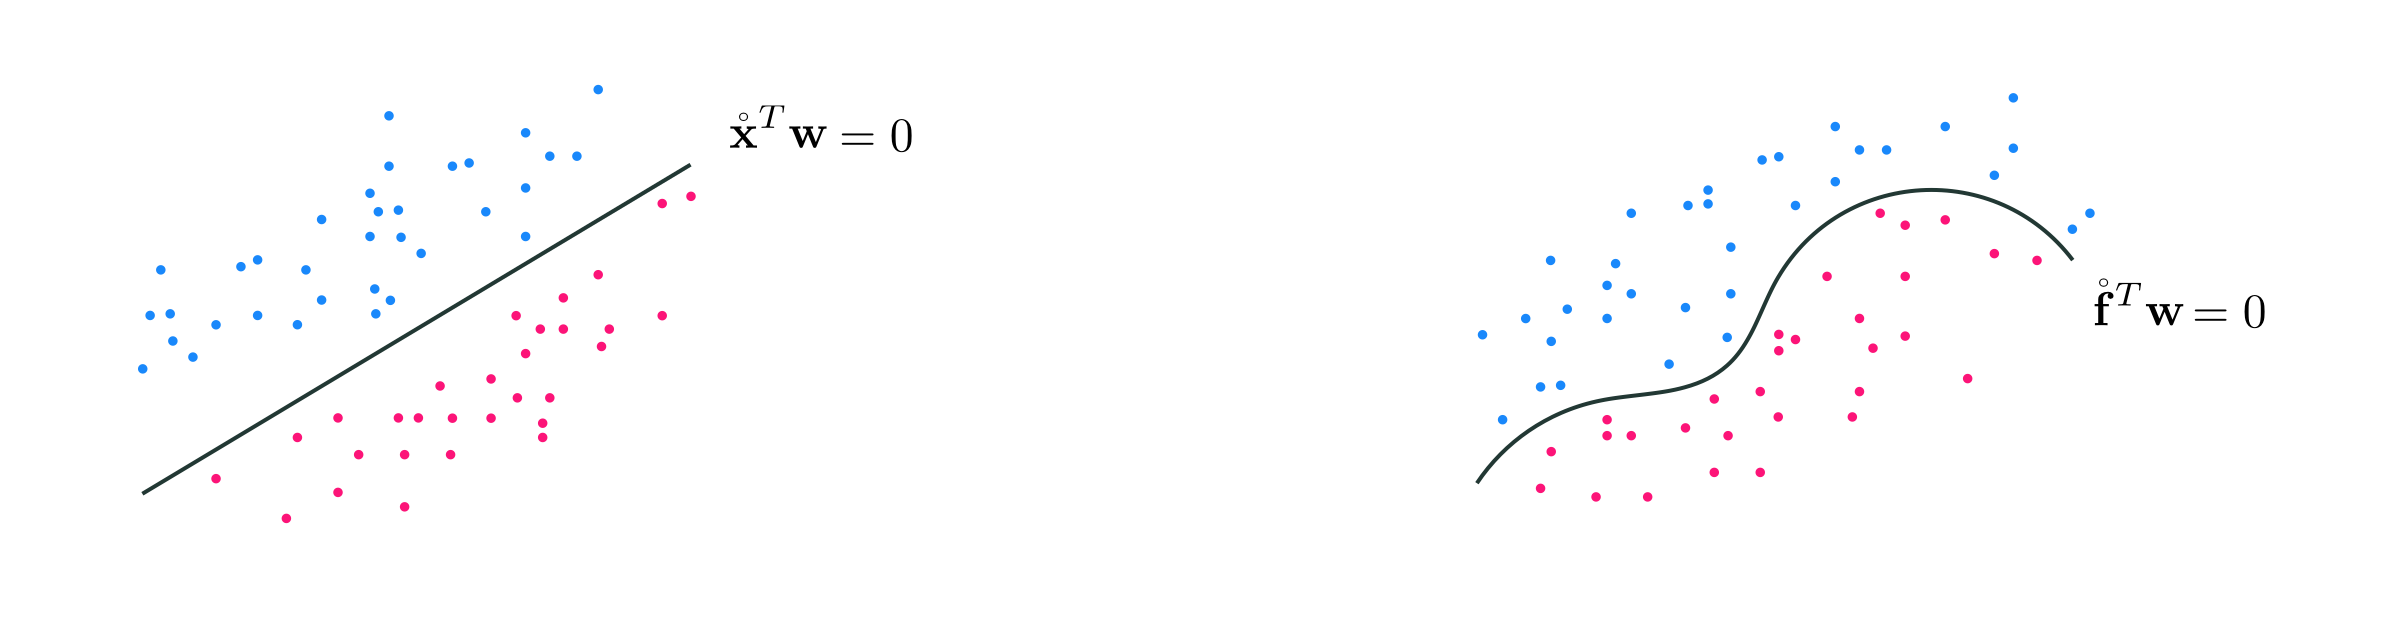

In [4]:
Image(image_path_1)

<figure>
<p>
</p>
<figcaption> <strong>Figure:</strong> <em> 
(left) Linear two-class classification illustrated. Here the separating boundary is defined by $\mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,}=0$. (right) Nonlinear two-class classification is achieved by injecting nonlinear feature transformations into our model in precisely the same way we did in Section 10.2 with nonlinear regression. Here the separating boundary is a nonlinear curve defined by $\mathring{\mathbf{f}}_{\,}^T\mathbf{w}^{\,}=0$.
    
</em>
</figcaption>
</figure>

Likewise to properly tune the paramters of $\Theta$ we must minimize a proper cost function with respect to it, like e.g., the Softmax cost


\begin{equation}
 g\left(\Theta\right) = \frac{1}{P}\sum_{p=1}^{P} \text{log}\left(1 + e^{-y_p  \mathring{\mathbf{f}}_{p}^T \mathbf{w}}\right).
\end{equation}

##  Feature engineering examples

In rare cases like e.g., for some low-dimensional datasets we can fairly easily engineer a proper set of nonlinear features for two-class classification 'by eye', that is by examining a dataset visually.  Below we explore several such examples. 

#### <span style="color:#a50e3e;">Example 1. </span> Linear classification 

To start lets re-examine the basic instance of linear classification through the lens of feature engineering.  Below we load in a simple single input dataset two class dataset with label values that is linearly separable (with only one input dimension this that the two classes are perfectly separable by linear decision boundary that is just a point).

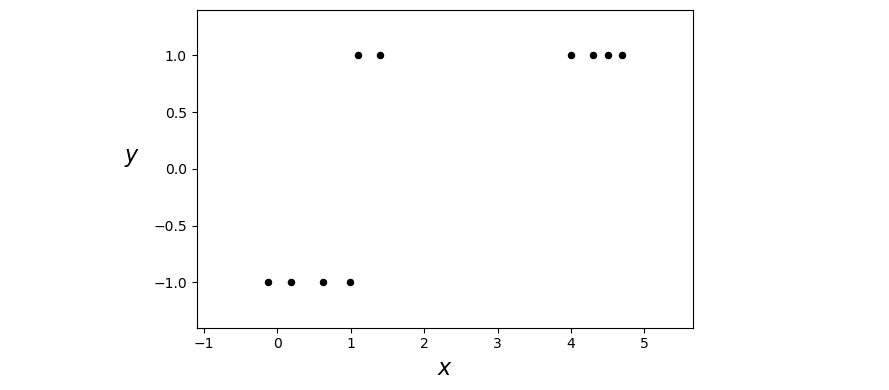

In [2]:
# load data
data = np.loadtxt(data_path_1,delimiter = ',')

# load in input/output data
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = section_10_4_helpers.ClassificationVisualizer(data)
demo.plot_data()

Here we would use our standard linear model 

\begin{equation}
\text{model}\left(x,\mathbf{w}_{\!}\right) = w_0 + xw_1.
\end{equation}

Although we did not explicitly call it such until this Chapter, here we are employing the simple *linear* feature transformation

\begin{equation}
f\left(x\right) = x
\end{equation}

and in this notation our `model` is then equivalently

\begin{equation}
\text{model}\left(x,\Theta\right) = w_0 + f\left(x\right)w_{1\,}.
\end{equation}

Note here that the weight set $\Omega = \left\{\mathbf{w}\right\}$.

Below we perform a run of gradient descent to minimize the Softmax cost on this dataset - first performing standard normalization on the input as detailed in [Section 9.3](https://jermwatt.github.io/machine_learning_refined/notes/9_Feature_engineer_select/9_3_Scaling.html).  This means (as detailed in the previous Section as well) that we can actually think of the normalization as being a part of the feature transformation itself, and write it formally as

\begin{equation}
f\left(x \right) = \frac{x - \mu}{\sigma}
\end{equation}

where $\mu$ and $\sigma$ are the mean and standard deviation of the dataset's input.  

We can then plot the hyperbolic tangent correspnoding to those weights providing the lowest cost function value during the run, as we do below.  The fit does indeed match the behavior of the dataset well and its linear decision boundary does indeed separate the two classes completely.

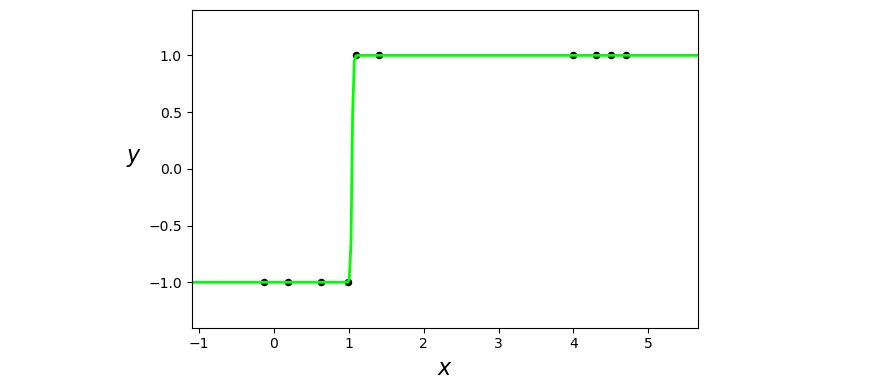

In [3]:
# the trivial linear feature transformation
def feature_transforms(x):      
    return x

# parameters for our two runs of gradient descent
w = 0.1*np.random.randn(2,1); max_its = 500; alpha_choice = 10**(2)

# run on normalized data
run = section_10_4_helpers.BaseSetup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# pluck out best weights - those that provided lowest cost, 
# and plot resulting fit
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.plot_fit(w_best,run.model,normalizer = run.normalizer);

#### <span style="color:#a50e3e;">Example 2. </span>  A one dimensional example of nonlinear classification 

In discussing classification through the lens of logistic regression in [Section 6.2](https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_2_Cross_entropy.html), we saw how linear classification can be thought of as a particular instance of nonlinear regression.  In particular how from this perspective we aim at fitting a curve (or surface in higher dimensions) that consists of a linear combination of our input shoved through the `tanh` function.  For $N=1$ dimensional input this regression looks like

\begin{equation}
\text{tanh}\left(w_0^{\,} + {x}_p {w}_{1}^{\,}\right) \approx y_p.
\end{equation}

Here our `model` is the simple linear one

\begin{equation}
\text{model}(x,\mathbf{w}) =  w_0 +_{\,} x_{\,}w_1.
\end{equation}

With classification this function defines the linear decision boundary - a single point in this instance - where $\text{model}(x,\mathbf{w}) = 0$.  After tuning our weights properly by e.g., minimizing the softmax cost function, this decision boundary provides us with predicted labels for every possible input.  In particular if $\text{model}(x,\mathbf{w}) > 0$ then $x$ assigned to $+1$ class, if $\text{model}(x,\mathbf{w}) < 0$ assigned to $-1$ class.  This is illustrated in the Figure below.  

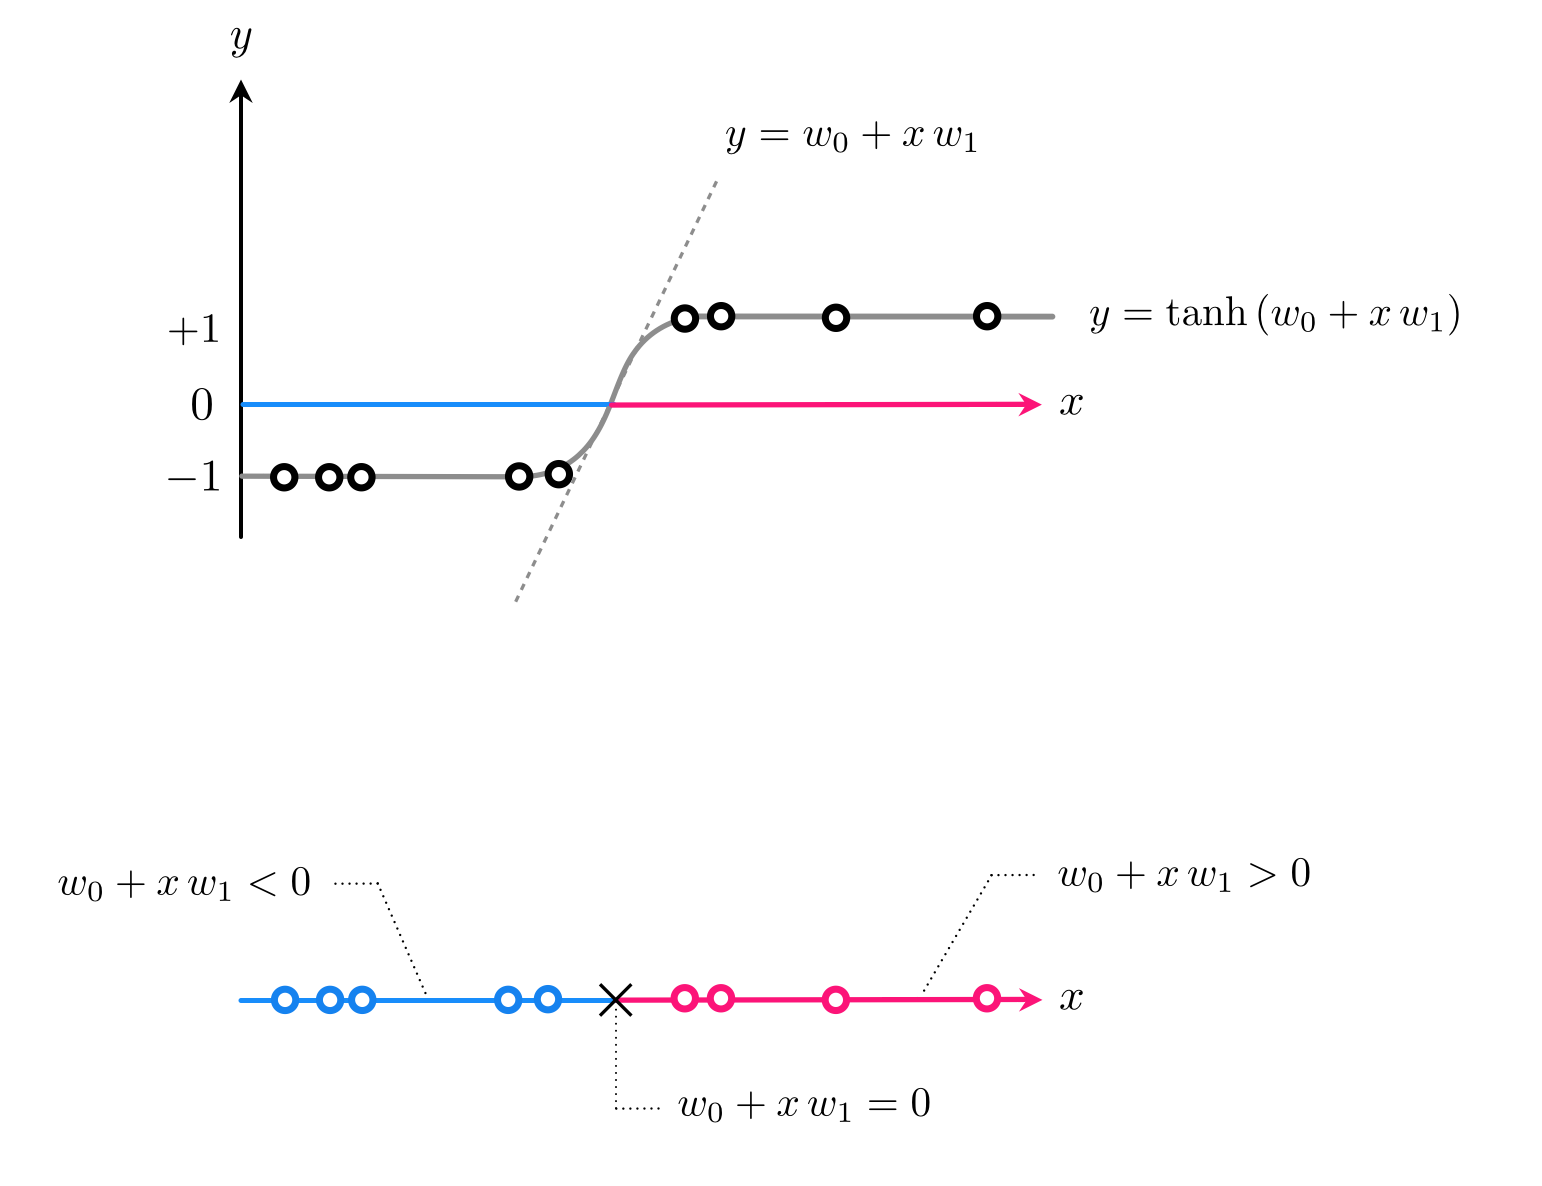

In [5]:
Image(image_path_2)

<figure>
<p>
  </p>
   <figcaption>   
<strong>Figure 2:</strong> <em> 
A prototypical $N = 1$ dimensional input shown from the regression perspective (top panel) and from 'above' (bottom panel) where label values are illustrated as colors (red for $+1$ and blue for $-1$).  A logistic regression fit providing perfect separation is shown in the top panel, along with the input line to `tanh` that defines the decision boundary for this problem (where this line pierces the input space).  Predictions are then made in the future based geometrically on this line / decision boundary, with predicted regions annotated in the bottom panel.
</em>  </figcaption> 
</figure>
</p>

However a linear predictor - a linear decision boundary - is quite inflexible in general and fails to provide good separation even in the simple example below.  Here we clearly need a `model` function that can cross the input space (the x axis) twice at points separated by a large distance - something a linear model can never do. 

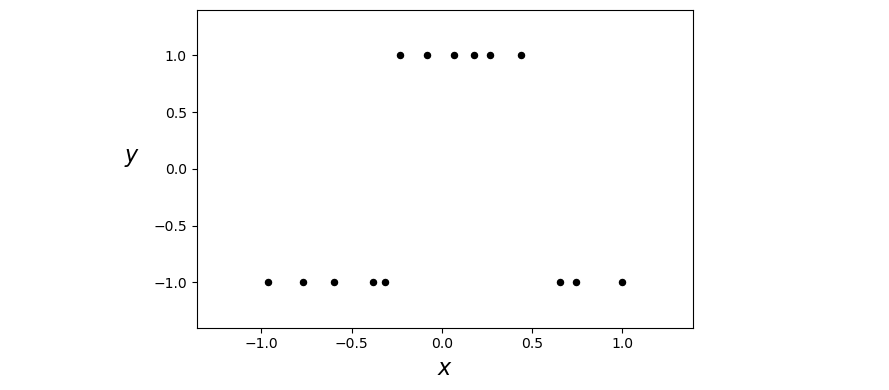

In [4]:
# load data
data = np.loadtxt(data_path_2,delimiter = ',')

# load in input/output data
x = data[:-1,:]
y = data[-1:,:] 

# plot dataset
demo = section_10_4_helpers.ClassificationVisualizer(data)
demo.plot_data()

What sort of simple function crosses the horizontal axis twice?  A quadratic function is a simple example.  If adjusted to the right height a quadratic certainly can be made to cross the horizontal axis twice and - when shoved through a `tanh` - could indeed give us the sort of predictions we desire.  This idea is drawn figuratively for a dataset like the one above in the Figure below, where a dataset like the one we are examinig is shown both from a regression perspective (top panel) and 'from above' where label values are represented by unique colors (bottom panel).

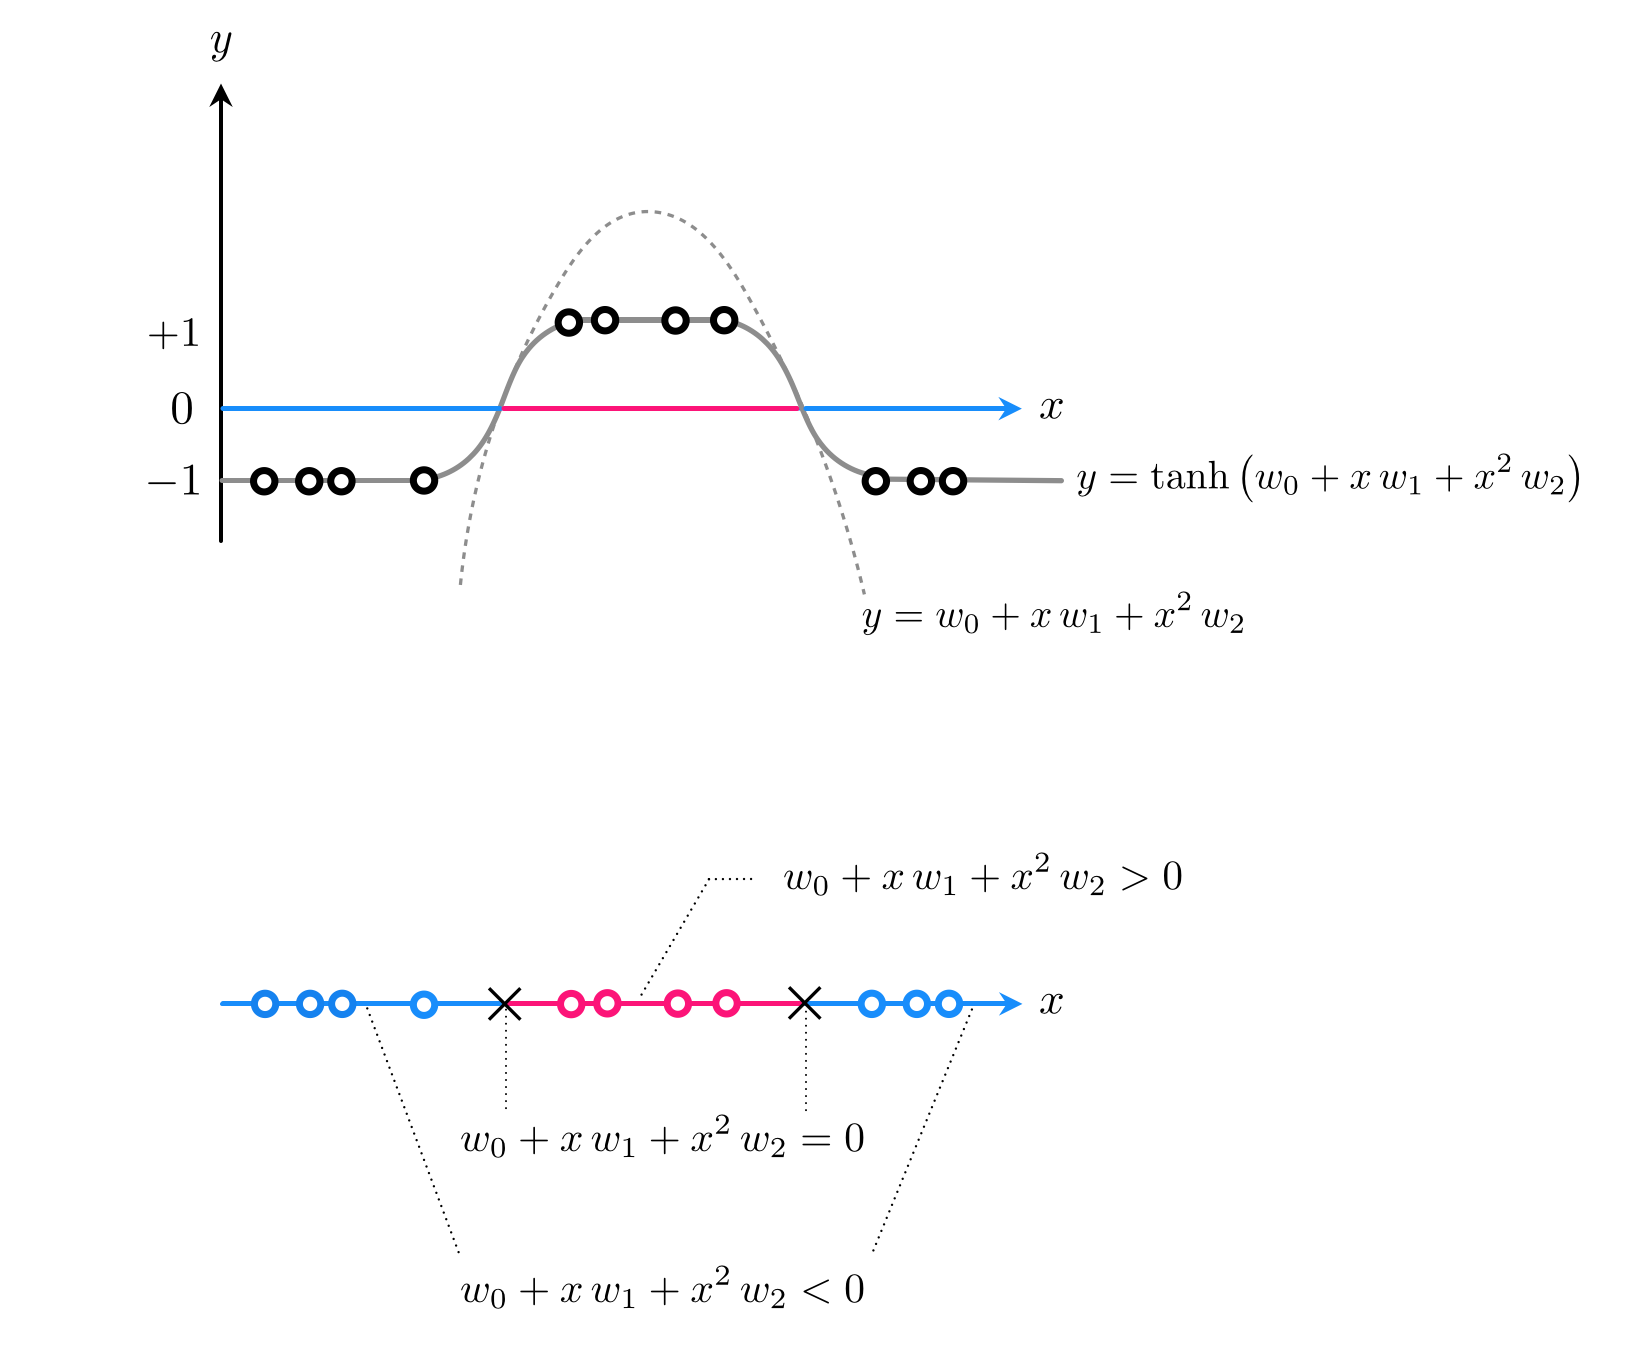

In [6]:
Image(image_path_3)

<p>
</p>
<figcaption>   
<strong>Figure 3:</strong> <em> 
An example dataset like the one we are currently looking to learn a classifier on (shown from the regression perspective in the top panel, and 'from above' in the bottom panel).  Here we show what a quadratic model could achieve in terms of providing a proper decision boundary consisting of two distinct and separate points, with the proper regions of the space classified accordingly. 
</em>  </figcaption> 
</figure>
</p>

Using a generic quadratic function as our `model` takes the form

\begin{equation}
\text{model}(x,\mathbf{w}) = w_0 + xw_1 + x^2w_2.
\end{equation}

Notice here how we have two *unparameterized* feature transformations: the identity $f_1(x) = x$ and the quadratic term $f_2(x) = x^2$, and so we may write the above equivalently as

\begin{equation}
\text{model}(x,\Theta) = w_0 + f_1(x)\,w_1 + f_2(x)\,w_2
\end{equation}

where here the weight set $\Theta = \left\{\mathbf{w}\right\}$.

We will then tune our parameters via applying gradient descent to minimize the Softmax cost, and to speed up its convergence we will apply *standard normalization* (as discussed in [Section 9.3](https://jermwatt.github.io/machine_learning_refined/notes/9_Feature_engineer_select/9_3_Scaling.html)) to the input of the data.  With our weights tuned and our predictor trained we can then plot the resulting fit / separation.  In the left panel we show the original dataset - from the regression perspective-  along with the nonlinear fit provided by our nonlinear logistic regressor $\text{tanh}\left(\text{model}\left(x, \mathbf{w}\right)\right) = y$.  In the right panel we show the same dataset only in the transformed feature space defined by our two features.  Here a datapoint that originally had input $x_p$ now has input $\left(f_1\left(x_p\right)\,,(f_2\left(x_p\right)\right)$.  In this space the separation / decision boundary is *linear*.

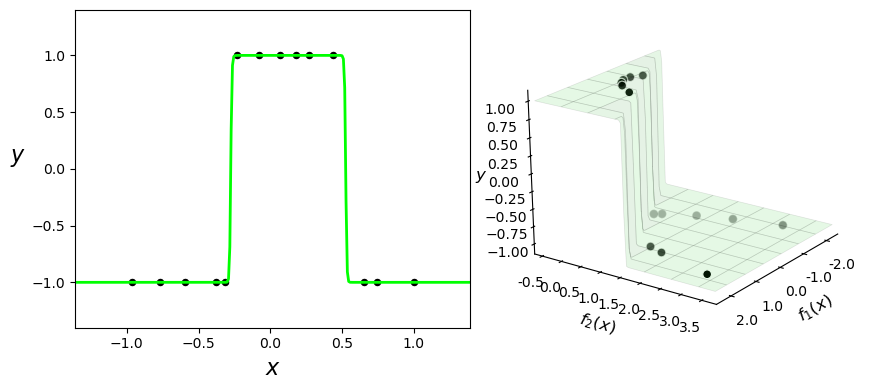

In [6]:
# our quadratic feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = np.array([(x.flatten()**d) for d in range(1,3)])   
    return f

# parameters for our two runs of gradient descent
w = 0.1*np.random.randn(3,1); max_its = 500; alpha_choice = 10**(2)

# run on normalized data
run = section_10_4_helpers.BaseSetup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# plot data and fit in original and feature transformed space
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.plot_fit_and_feature_space(w_best,run.model,run.feature_transforms,normalizer = run.normalizer,view = [25,35])

What we see with this example - a nonlinear decision boundary in the original space being simultaneously *linear* in the transformed feature space - always happens in practice if we have chosen our features well (i.e., as to provide a good nonlinear decision boundary in the original space).  

Also notice here that since we have used two features our feature space is one dimension larger than the original space.  As was the case with regression this is true more generally speaking: the more feature transforms we use the higher the up we go in terms of the dimensions of our transformed feature space / linear separation!  In general if our original input has dimension $N$ - and is written as $\mathbf{x}$ - and we use a `model` function that employs $B$ nonlinear (parameterized or unparameterized) feature transformations then our original space has $N$ dimensional input, while our transformed feature space is $B$ dimensional.  Note here that the set of all weights $\omega$ contains not only the weights $w_1,\,w_2,...,w_B$ from the linear combination, but also any features's internal parameters as well.

#### <span style="color:#a50e3e;">Example 3. </span> Finding an elliptical boundary separating two classes

Let us examine the following $N=2$ input dataset below, visualized the regression perspective (left panel) and 'from above' (right panel).

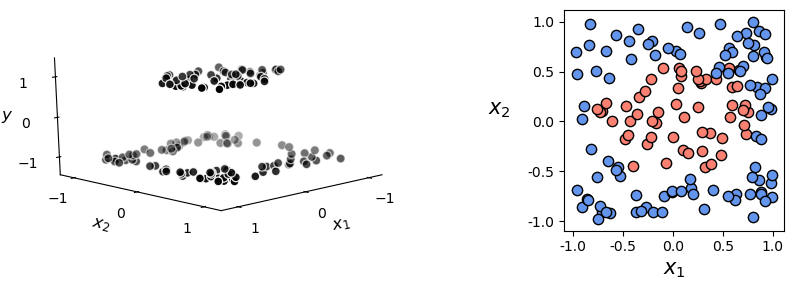

In [18]:
# create instance of linear regression demo, used below and in the next examples
demo = section_10_4_helpers.NonlinearVisualizer(data_path_3)
x = demo.x.T
y = demo.y[np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo.plot_data();

Visually examining the dataset it appears that some sort of elliptical decision boundary centered at the origin might do a fine job of classification.  Thus we set our `model` function to the general parameterized form of such an ellipse   

\begin{equation}
\text{model}(\mathbf{x},\Theta) = w_0^{\,} + x_1^2w_1^{\,} + x_2^2w_2^{\,}.
\end{equation}

Parsing this formula ,we can see that we have used two feature transformations $f_1(\mathbf{x})=x_1^2$, $f_2(\mathbf{x}) = x_2^2$, and the parameter set $\Theta = \left\{w_0,\,w_1,\,w_2\right\}$.

With our weights tuned - by minimizing the Softmax cost via gradient descent - we can plot the data in its original space (left panels) - along with the nonlinear decision boundary provided by the trained predictor - and in the transformed feature space (right panels) - where the corresponding decision boundary is linear.  In each panel we color a region of space by what class our predictor assigns it post training.  Indeed our presumption of an elliptical boundary seems like a good one here - as our classification results are quite good.

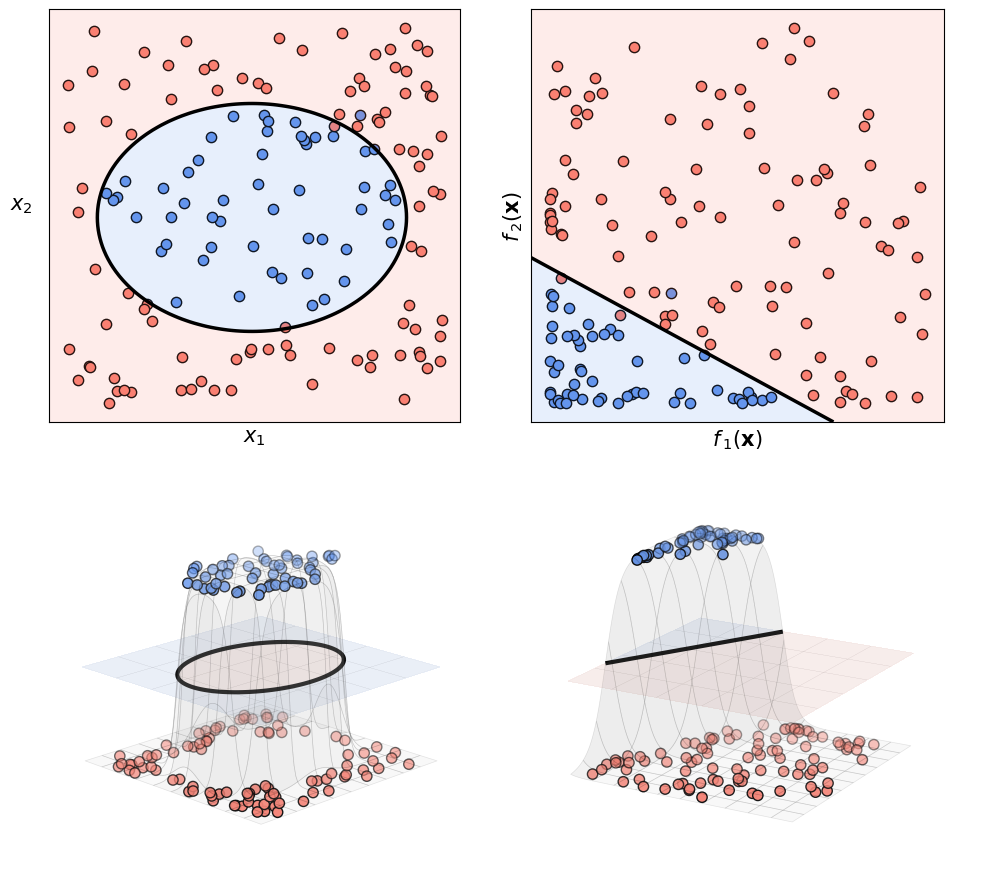

In [20]:
# a elliptical feature transformation
def feature_transforms(x):
    # calculate feature transform
    f = x**2  
    return f

# parameters for our two runs of gradient descent
w = 0.1*np.random.randn(3,1); max_its = 1000; alpha_choice = 10**(0)

# run on normalized data
run = section_10_4_helpers.BaseSetup(x,y,feature_transforms,'softmax',normalize = 'none')
run.fit(w=w,alpha_choice = alpha_choice,max_its = max_its)

# illustrate results
ind = np.argmin(run.cost_history)
w_best = run.weight_history[ind]
demo.static_N2_img(w_best,run,view1 = [20,45],view2 = [20,30])

## Implementing nonlinear two-class classification in `Python`

The general nonlinear model in equation (4) above can be implemented precisely as described in [Section 10.2.4](https://jermwatt.github.io/machine_learning_refined/notes/10_Nonlinear_intro/10_2_Regression.html). since - indeed - it is the same general nonlinear model we use with nonlinear regression.  Therefore, just as with regression, the we need not alter the implementation of any two-class classification cost function introduced in Chapter 6 to perform nonlinear classification: all we need to do is properly define our nonlinear transformation(s) in `Python` (if we wish to use an automatic differentiator then these should be expressed using `autograd`'s `numpy` wrapper).  

For example, one way to implement the feature transformation used in Example 3 is shown below.

In [8]:
# feature transformation shown in Example 3
def feature_transforms(x):
    # calculate feature transform
    f = x**2  
    return f